## Import libraries
In this model, we use our experience  from lab works

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx
import nltk
import re
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

#### Import data from kaggle

In [2]:
data = pd.read_csv('tweet_emotions.csv')
data

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


In [6]:
data.sentiment.nunique()

13

In [8]:
data_copy = data.copy()
data_copy

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


### Show emotions number

<AxesSubplot:xlabel='count', ylabel='sentiment'>

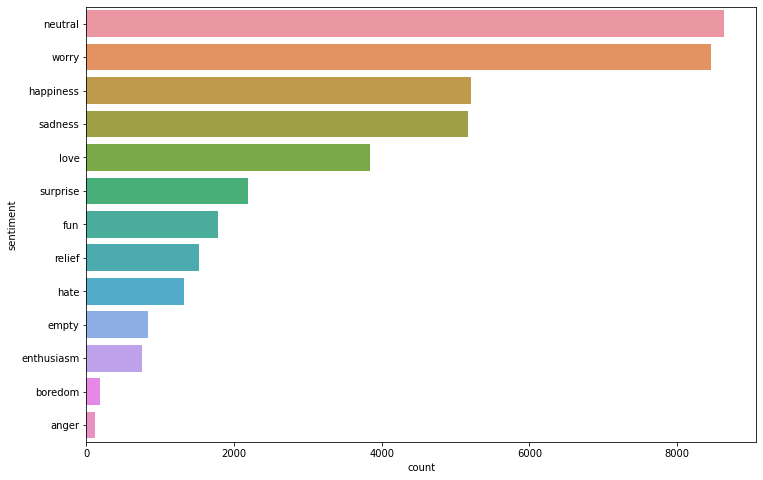

In [9]:
plt.figure(figsize = (12,8))
sns.countplot(y=data_copy.sentiment,data = data_copy,order = data_copy.sentiment.value_counts().index)

**In this bar you see some bad data, such that 'Empty', 'Anger', 'boredom'**

We create function that merge some data

In [10]:
def labels(sentiment):
    if sentiment=='hate' or sentiment == 'anger':
        return 'hate/anger'
    elif sentiment == 'empty' or sentiment == 'boredom':
        return 'empty/boredom'
    elif sentiment == 'surprise' or sentiment == 'enthusiasm':
        return 'surprise/enthusiasm'
    else:
        return sentiment

data_copy['sentiment'] = data_copy.apply(lambda x: labels(x['sentiment']),axis=1)
data_copy

,tweet_id,sentiment,content
0,1956967341,empty/boredom,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,surprise/enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...
...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor
39996,1753919001,love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...


### Cleaning text with module 'neattext'

In [11]:
data_copy['Clean_Text'] = data_copy['content'].apply(nfx.remove_userhandles)
data_copy

,tweet_id,sentiment,content,Clean_Text
0,1956967341,empty/boredom,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier ...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,1956967789,surprise/enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,We want to trade with someone who has Housto...
...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,
39996,1753919001,love,Happy Mothers Day All my love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY...


In [12]:
data_copy['Clean_Text'].to_list()

['  i know  i was listenin to bad habit earlier and i started freakin at his part =[',
 'Layin n bed with a headache  ughhhh...waitin on your call...',
 'Funeral ceremony...gloomy friday...',
 'wants to hang out with friends SOON!',
 '  We want to trade with someone who has Houston tickets, but no one will.',
 "Re-pinging   why didn't you go to prom? BC my bf didn't like my friends",
 "I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!",
 'Hmmm. http://www.djhero.com/ is down',
 '  Charlene my love. I miss you',
 "  I'm sorry  at least it's Friday?",
 'cant fall asleep',
 'Choked on her retainers',
 'Ugh! I have to beat this stupid song to get to the next  rude!',
 '  if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch itonlinelol',
 'Got the news',
 'The storm is here and the electricity is gone',
 '  agreed',
 "So sleepy again and it's not ev

In [13]:
data_copy['Clean_Text_1'] = data_copy['Clean_Text'].apply(nfx.remove_urls)
data_copy

,tweet_id,sentiment,content,Clean_Text,Clean_Text_1
0,1956967341,empty/boredom,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier ...,i know i was listenin to bad habit earlier ...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,1956967789,surprise/enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends SOON!,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,We want to trade with someone who has Housto...,We want to trade with someone who has Housto...
...,...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,,
39996,1753919001,love,Happy Mothers Day All my love,Happy Mothers Day All my love,Happy Mothers Day All my love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,Happy Mother's Day to all the mommies out ther...,Happy Mother's Day to all the mommies out ther...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY...


In [14]:
data_copy['Clean_Text_1'].to_list()

['  i know  i was listenin to bad habit earlier and i started freakin at his part =[',
 'Layin n bed with a headache  ughhhh...waitin on your call...',
 'Funeral ceremony...gloomy friday...',
 'wants to hang out with friends SOON!',
 '  We want to trade with someone who has Houston tickets, but no one will.',
 "Re-pinging   why didn't you go to prom? BC my bf didn't like my friends",
 "I should be sleep, but im not! thinking about an old friend who I want. but he's married now. damn, &amp; he wants me 2! scandalous!",
 'Hmmm.  is down',
 '  Charlene my love. I miss you',
 "  I'm sorry  at least it's Friday?",
 'cant fall asleep',
 'Choked on her retainers',
 'Ugh! I have to beat this stupid song to get to the next  rude!',
 '  if u watch the hills in london u will realise what tourture it is because were weeks and weeks late  i just watch itonlinelol',
 'Got the news',
 'The storm is here and the electricity is gone',
 '  agreed',
 "So sleepy again and it's not even that late. I fail o

In [15]:
data_copy['Clean_Text_stopwords'] = data_copy['Clean_Text_1'].apply(nfx.remove_stopwords)
data_copy

,tweet_id,sentiment,content,Clean_Text,Clean_Text_1,Clean_Text_stopwords
0,1956967341,empty/boredom,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier ...,i know i was listenin to bad habit earlier ...,know listenin bad habit earlier started freaki...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhh...waitin call...
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...
3,1956967789,surprise/enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends SOON!,wants to hang out with friends SOON!,wants hang friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,We want to trade with someone who has Housto...,We want to trade with someone who has Housto...,"want trade Houston tickets, will."
...,...,...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,,,
39996,1753919001,love,Happy Mothers Day All my love,Happy Mothers Day All my love,Happy Mothers Day All my love,Happy Mothers Day love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,Happy Mother's Day to all the mommies out ther...,Happy Mother's Day to all the mommies out ther...,"Happy Mother's Day mommies there, woman man lo..."
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP NEW HIT S...


In [16]:
data_copy['Clean_Text_punct'] = data_copy['Clean_Text_stopwords'].apply(nfx.remove_punctuations)
data_copy

,tweet_id,sentiment,content,Clean_Text,Clean_Text_1,Clean_Text_stopwords,Clean_Text_punct
0,1956967341,empty/boredom,@tiffanylue i know i was listenin to bad habi...,i know i was listenin to bad habit earlier ...,i know i was listenin to bad habit earlier ...,know listenin bad habit earlier started freaki...,know listenin bad habit earlier started freaki...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,Layin n bed with a headache ughhhh...waitin o...,Layin n bed headache ughhhh...waitin call...,Layin n bed headache ughhhhwaitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,Funeral ceremony...gloomy friday...,Funeral ceremonygloomy friday
3,1956967789,surprise/enthusiasm,wants to hang out with friends SOON!,wants to hang out with friends SOON!,wants to hang out with friends SOON!,wants hang friends SOON!,wants hang friends SOON
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,We want to trade with someone who has Housto...,We want to trade with someone who has Housto...,"want trade Houston tickets, will.",want trade Houston tickets will
...,...,...,...,...,...,...,...
39995,1753918954,neutral,@JohnLloydTaylor,,,,
39996,1753919001,love,Happy Mothers Day All my love,Happy Mothers Day All my love,Happy Mothers Day All my love,Happy Mothers Day love,Happy Mothers Day love
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,Happy Mother's Day to all the mommies out ther...,Happy Mother's Day to all the mommies out ther...,"Happy Mother's Day mommies there, woman man lo...",Happy Mothers Day mommies there woman man long...
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP OUT MY...,WASSUP BEAUTIFUL!!! FOLLOW ME!! PEEP NEW HIT S...,WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SINGLE...


In [17]:
data_copy['Clean_Text_punct'].to_list()

['know listenin bad habit earlier started freakin =[',
 'Layin n bed headache ughhhhwaitin call',
 'Funeral ceremonygloomy friday',
 'wants hang friends SOON',
 'want trade Houston tickets will',
 'Repinging prom BC bf like friends',
 'sleep im not thinking old friend want hes married now damn amp wants 2 scandalous',
 'Hmmm',
 'Charlene love miss',
 'Im sorry Friday',
 'cant fall asleep',
 'Choked retainers',
 'Ugh beat stupid song rude',
 'u watch hills london u realise tourture weeks weeks late watch itonlinelol',
 'Got news',
 'storm electricity gone',
 'agreed',
 'sleepy late fail again',
 'lady gaga tweeted impressed video leaking know',
 'convinced wanted you signals offdamn think lost friend',
 'oh bad hope gets better Ive sleep issues lately',
 'Wondering Im awake 7amwriting new songplotting evil secret plots muahahahaoh damn itnot secret anymore',
 'Topic Maps talks Balisage Markup Conference 2009 Program online (via #topicmaps',
 'ate know is Telling things food',
 'tired th

## Tokenization

In [19]:
tokenization = nltk.tokenize.RegexpTokenizer(r'\w+')
data_copy['Text_tokenization'] = data_copy['Clean_Text_punct'].apply(lambda x: tokenization.tokenize(x))
data_copy['Text_tokenization']

0        [know, listenin, bad, habit, earlier, started,...
1            [Layin, n, bed, headache, ughhhhwaitin, call]
2                        [Funeral, ceremonygloomy, friday]
3                             [wants, hang, friends, SOON]
4                    [want, trade, Houston, tickets, will]
                               ...                        
39995                                                   []
39996                          [Happy, Mothers, Day, love]
39997    [Happy, Mothers, Day, mommies, there, woman, m...
39998    [WASSUP, BEAUTIFUL, FOLLOW, ME, PEEP, NEW, HIT...
39999    [bullet, train, tokyo, gf, visiting, japan, th...
Name: Text_tokenization, Length: 40000, dtype: object

## Lemmatization

In [20]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize_word(tokenization):
    return [wordnet_lemmatizer.lemmatize(token, pos="v") for token in tokenization]

In [21]:
data_copy['Text_Lemmatization'] = data_copy['Text_tokenization'].apply(lambda x : lemmatize_word(x))
data_copy['Text_Lemmatization']

0        [know, listenin, bad, habit, earlier, start, f...
1            [Layin, n, bed, headache, ughhhhwaitin, call]
2                        [Funeral, ceremonygloomy, friday]
3                              [want, hang, friends, SOON]
4                     [want, trade, Houston, ticket, will]
                               ...                        
39995                                                   []
39996                          [Happy, Mothers, Day, love]
39997    [Happy, Mothers, Day, mommies, there, woman, m...
39998    [WASSUP, BEAUTIFUL, FOLLOW, ME, PEEP, NEW, HIT...
39999    [bullet, train, tokyo, gf, visit, japan, thurs...
Name: Text_Lemmatization, Length: 40000, dtype: object

## Combine text

In [22]:
def combine_text(list_of_text):
    '''Takes a list of text and combines them into one large chunk of text.'''
    combined_text = ' '.join(list_of_text)
    return combined_text

data_copy['Final_text'] = data_copy['Text_Lemmatization'].apply(lambda x : combine_text(x))
data_copy['Final_text']

0            know listenin bad habit earlier start freakin
1                   Layin n bed headache ughhhhwaitin call
2                            Funeral ceremonygloomy friday
3                                   want hang friends SOON
4                           want trade Houston ticket will
                               ...                        
39995                                                     
39996                               Happy Mothers Day love
39997    Happy Mothers Day mommies there woman man long...
39998    WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SINGLE...
39999    bullet train tokyo gf visit japan thursday vac...
Name: Final_text, Length: 40000, dtype: object

In [23]:
Final_data = data_copy[['Final_text', 'sentiment']].copy()
Final_data

,Final_text,sentiment
0,know listenin bad habit earlier start freakin,empty/boredom
1,Layin n bed headache ughhhhwaitin call,sadness
2,Funeral ceremonygloomy friday,sadness
3,want hang friends SOON,surprise/enthusiasm
4,want trade Houston ticket will,neutral
...,...,...
39995,,neutral
39996,Happy Mothers Day love,love
39997,Happy Mothers Day mommies there woman man long...,love
39998,WASSUP BEAUTIFUL FOLLOW ME PEEP NEW HIT SINGLE...,happiness


## Create model

In [24]:
Xfeatures = Final_data['Final_text']
ylabels = Final_data['sentiment']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.3, random_state=42)

In [26]:
from sklearn.pipeline import Pipeline

In [27]:
pipe_lr = Pipeline(steps=[('cv',TfidfVectorizer()),('lr',LogisticRegression())])

In [28]:
pipe_lr.fit(x_train,y_train)

c:\users\пользователь\pycharmprojects\selenium_project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', TfidfVectorizer()), ('lr', LogisticRegression())])

In [29]:
pipe_lr.score(x_test,y_test)

0.33708333333333335

In [35]:
pipe_lr_2 = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [54]:
pipe_lr_2.fit(x_train,y_train)

c:\users\пользователь\pycharmprojects\selenium_project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [37]:
pipe_lr_2.score(x_test,y_test)

0.32916666666666666

In [38]:
pipe_lr_3 = Pipeline(steps=[('cv', CountVectorizer()),('lr',LogisticRegression(C=1,penalty="l2"))])

In [39]:
pipe_lr_3.fit(x_train,y_train)

c:\users\пользователь\pycharmprojects\selenium_project\venv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression(C=1))])

In [40]:
pipe_lr_3.score(x_test,y_test)

0.32916666666666666

## Example

In [80]:
ex1 = "This book was so interesting it made me happy"
ex2 = "I am just a man"
ex3 = "Wow man"

In [57]:
pipe_lr.predict([ex1])

array(['happiness'], dtype=object)

In [62]:
pipe_lr.predict([ex2])

array(['sadness'], dtype=object)

In [81]:
pipe_lr.predict([ex3])

array(['surprise/enthusiasm'], dtype=object)

In [82]:
pipe_lr.classes_

array(['empty/boredom', 'fun', 'happiness', 'hate/anger', 'love',
       'neutral', 'relief', 'sadness', 'surprise/enthusiasm', 'worry'],
      dtype=object)

In [84]:
import joblib
pipeline_file = open("emotion_classifier_model.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()